In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from IPython.display import display, HTML


Перша задача - зібрати дані.

Як збирались дані

В нас є Youtube API:

https://www.googleapis.com/youtube/v3/channels - Інформація по ютуб канал

https://www.googleapis.com/youtube/v3/playlistItems - Про плейлісти цього каналу, один з них - це всі відео цього каналу

https://www.googleapis.com/youtube/v3/videos - Інформація про відео, а також статистика: Кількість переглядів, лайків і коментів.






Я докидав всі айтішні канали, на які був підписаний

І аналізував відео з цих каналів.

Основний кластер ютуб каналів - це англомовні відео


322 канала

154 230 відео

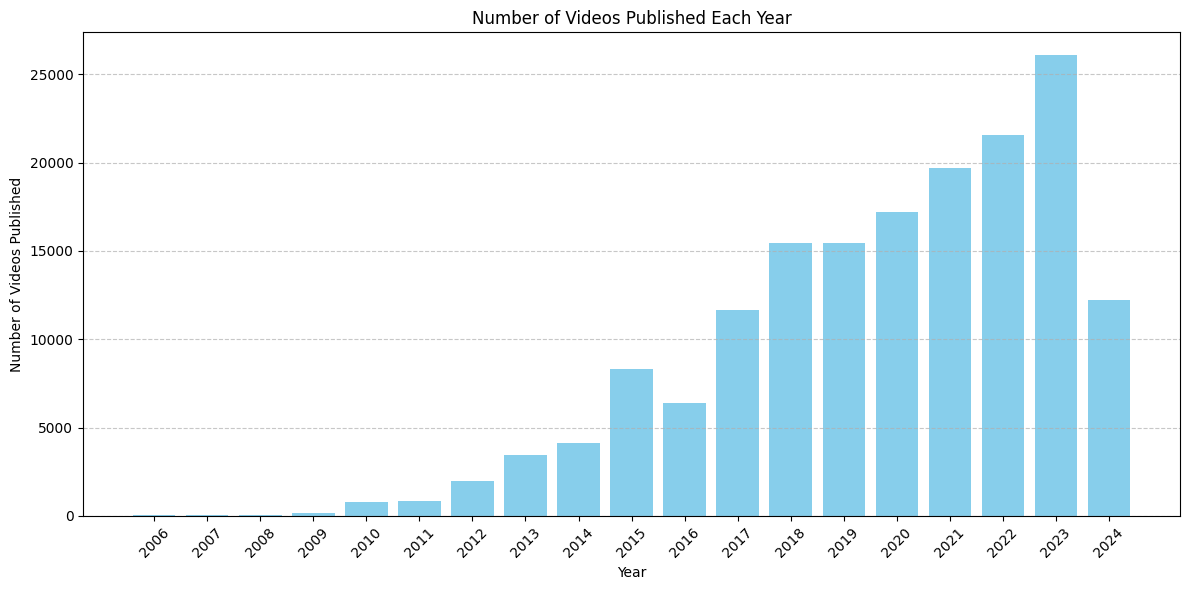

In [2]:


# Read data from CSV
years = []
published_counts = []

with open('published_videos.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        years.append(int(row[0]))
        published_counts.append(int(row[1]))

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(years, published_counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Videos Published')
plt.title('Number of Videos Published Each Year')
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('all_videos.csv')


top_1_records = df.head(1)
print(top_1_records)

     Id   Identifier                PublishedDate  \
0  3896  4wURs-67mB0  2024-05-02 11:30:02.0000000   

                                          Title  \
0  The Only .NET Scheduler You Should Be Using!   

                                           Thumbnail  ChannelId  \
0  https://i.ytimg.com/vi/4wURs-67mB0/maxresdefau...         32   

   CommentsCount  LikeCount  ViewCount  DurationInSec  
0             19         55        985            998  


In [4]:
def convert_seconds(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    remaining_seconds = seconds % 60
    return f"{int(hours)}h {int(minutes)}m {int(remaining_seconds)}s"
    
# Ensure the PublishedDate column is in datetime format
df['PublishedDate'] = pd.to_datetime(df['PublishedDate'])

# Extract year and month from PublishedDate
df['YearMonth'] = df['PublishedDate'].dt.to_period('M')

# Convert DurationInSec to numeric (if it is not already)
df['DurationInSec'] = pd.to_numeric(df['DurationInSec'], errors='coerce')

# Drop rows with NaN values in DurationInSec
df = df.dropna(subset=['DurationInSec'])

# Find the longest video for each month
longest_videos = df.loc[df.groupby('YearMonth')['DurationInSec'].idxmax()]

# Sort by PublishedDate for better readability
longest_videos = longest_videos.sort_values('PublishedDate')

longest_videos['DurationFormatted'] = longest_videos['DurationInSec'].apply(convert_seconds)

# Display the result in a table
# Selecting relevant columns for the table display
relevant_columns = ['PublishedDate', 'Title', 'DurationFormatted', 'Identifier']
display_table = longest_videos[relevant_columns]

# Output the table
display_table.reset_index(drop=True, inplace=True)  # Reset the index for a cleaner display
display_table.style.set_table_styles([{
    'selector': 'thead th',
    'props': [('background-color', '#f4f4f4'), ('color', 'black')]
}])


Generate top 5 videos for each year by likes

In [5]:
# Extract year from PublishedAt
df['Year'] = df['PublishedDate'].dt.year

# Define the relevant columns
relevant_columns = ['PublishedDate', 'Title', 'Identifier', 'LikeCount', 'ViewCount', 'CommentsCount', 'Year']
df_relevant = df[relevant_columns]

def get_top_5_liked_videos_per_year(df):
    top_videos = df.sort_values(['Year', 'LikeCount'], ascending=[True, False]).groupby('Year').head(5)
    return top_videos

top_5_videos_per_year = get_top_5_liked_videos_per_year(df_relevant)

for year, group in top_5_videos_per_year.groupby('Year'):
    display(f"Top 5 Liked Videos for {year}")
    display(group[relevant_columns])

'Top 5 Liked Videos for 2006'

PublishedDate                           Title   Identifier  \
14344 2006-12-31 09:46:27        Kitty Loves Tissue Paper  6ijoc2Ux6XA   
14345 2006-08-31 05:36:12      Taskbar Preview with Vista  ou6dX1ndDt0   
73417 2006-12-06 11:10:19    Life Hacks with Gina Trapani  uEZez4vED20   
73455 2006-02-08 23:17:57  The State of the Mono Project.  mbt-iJmw5qo   
73456 2006-02-01 04:38:58          Continuous Integration  d4wFiCubO6U   

       LikeCount  ViewCount  CommentsCount  Year  
14344          3         69              0  2006  
14345          1       1095              0  2006  
73417          1         22              0  2006  
73455          1         26              0  2006  
73456          1         19              0  2006

'Top 5 Liked Videos for 2007'

PublishedDate                                        Title  \
63709 2007-02-25 18:39:27            Lego Mindstorms Warehouse Project   
73374 2007-09-29 23:58:32  Voice Recognition for Beating a Typing Test   
73392 2007-06-12 22:55:27               Windows Browser Speed Shootout   
73377 2007-09-18 19:29:07     DeskSpace - 3D Virtual Desktop for Vista   
78131 2007-01-26 21:51:06       Designing Objects and Systems - Models   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
63709  mR3veXMPoQE        726     484321            169  2007  
73374  GeyS3sQufig         44      19275             12  2007  
73392  XVmduIF4aSI         20       9701             14  2007  
73377  1mdMSN7c27A         11      40285              6  2007  
78131  GdgHiex3hNA          8       9899              0  2007

'Top 5 Liked Videos for 2008'

PublishedDate                                              Title  \
118000 2008-12-22 02:29:37       PHP Basics: Serverside Programming Languages   
10398  2008-10-10 03:27:53                             Quorum Overview Part 1   
57890  2008-12-24 10:54:03  Tasmanian Electric Flying Trike - First Flight...   
7731   2008-10-17 12:56:08        How to GLITCH the Halo 2 Achievements on PC   
73340  2008-05-30 05:42:39               Pure Digital Flip Video Ultra Review   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
118000  2AzmgHV4uuc        143      16151             11  2008  
10398   j9E1LgLwG88        112      52978             20  2008  
57890   FSp7Qd1muZc        112      67348             35  2008  
7731    rqZCi5JHM9M         88      20352            147  2008  
73340   u9PJvb0AbWs         79      44938             56  2008

'Top 5 Liked Videos for 2009'

PublishedDate                                      Title  \
33999  2009-10-15 09:24:55                           UML Introduction   
117977 2009-09-21 03:39:18  Introduction to the Document Object Model   
34037  2009-10-05 10:45:22                     Factory Design Pattern   
7727   2009-07-19 02:45:07          How To Make The World's Best Milo   
33998  2009-10-15 09:47:02                           Use Case Diagram   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
33999   FkRwbVUVFvE       1168     354520             71  2009  
117977  -0ZcldkGlt8       1161     117041             94  2009  
34037   yDEmb5XYc_s       1159     375608            145  2009  
7727    C_cmMVcYe4s        686      96571            342  2009  
33998   Zk-580BqSNY        513     204811             51  2009

'Top 5 Liked Videos for 2010'

PublishedDate                                Title   Identifier  \
17390 2010-12-12 17:35:51            TCP/IP and Subnet Masking  EkNq4TrHP_U   
17388 2010-12-12 21:21:30              Introduction to Hacking  yGIHjTmTFfA   
17394 2010-12-10 20:01:11            The OSI Model Demystified  HEEnLZV2wGI   
23947 2010-07-02 19:46:46  Gestures and Body Language Tutorial  ZUXtGQkJcQ0   
17383 2010-12-13 14:05:00     Introduction to HTML Programming  fS7w-TXinPE   

       LikeCount  ViewCount  CommentsCount  Year  
17390      42637    3783223           3694  2010  
17388      30187    3115420           5272  2010  
17394      25983    1672442           1798  2010  
23947      15090    1399134           1764  2010  
17383      11235    1299520           1741  2010

'Top 5 Liked Videos for 2011'

PublishedDate                             Title   Identifier  \
17315 2011-02-24 21:31:25       Introduction to Programming  lJnvq0A_7WQ   
17313 2011-04-21 15:49:13  VPN - Virtual Private Networking  q4P4BjjXghQ   
17327 2011-02-17 18:55:15             Introduction to Linux  _gCwCOhMcog   
17316 2011-02-18 15:45:14        Introduction to Networking  rL8RSFQG8do   
17332 2011-02-17 10:50:36           Introduction to Servers  CDxaRfwzFrs   

       LikeCount  ViewCount  CommentsCount  Year  
17315      32069    2380542           2152  2011  
17313      23153    2240375           1750  2011  
17327      22829    2297993           2635  2011  
17316      17420    2110375           1324  2011  
17332      15937    1451197           1175  2011

'Top 5 Liked Videos for 2012'

PublishedDate                                              Title  \
35001 2012-03-30 10:47:00  Inner Join, Left Join, Right Join and Full Out...   
9375  2012-12-25 00:21:23  1. Unity Tutorial Basics - Create a Survival Game   
30718 2012-10-05 10:00:09          Game Programming - Episode 1 - Resolution   
17301 2012-02-03 15:05:57                     Introduction to Virtualization   
23623 2012-08-25 02:00:58                            Strategy Design Pattern   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
35001  KTvYHEntvn8      26905    1705988           1029  2012  
9375   fRED_-LvJKQ      16402    1920525           2649  2012  
30718  GFYT7Lqt1h8      10762     748600           1072  2012  
17301  zLJbP6vBk2M      10480     918910            861  2012  
23623  -NCgRD9-C6o      10398     742541           1024  2012

'Top 5 Liked Videos for 2013'

PublishedDate                                              Title  \
8006  2013-10-21 23:21:08  Web Development Tutorial for Beginners (#1) - ...   
9328  2013-08-06 19:54:53                      1. MAKE a GAME Basics (Unity)   
17243 2013-03-01 00:07:07  Installing Active Directory, DNS and DHCP to C...   
17245 2013-02-22 23:37:03  Introduction to Active Directory Directory Ser...   
8005  2013-10-23 01:02:27  Web Development Tutorial for Beginners (#2) - ...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8006   3JluqTojuME      57728    4825770           3282  2013  
9328   g5QFW12utdU      21863    2160436           2245  2013  
17243  0WyBxwJD_c0      21392    2621429           1001  2013  
17245  lFwek_OuYZ8      20212    1774444           1562  2013  
8005   gBi8Obib0tw      16514    1673969           1577  2013

'Top 5 Liked Videos for 2014'

PublishedDate                                              Title  \
28763 2014-04-04 14:30:21  CS50 Lecture by Mark Zuckerberg - 7 December 2005   
23386 2014-11-10 19:59:22                                 Python Programming   
23385 2014-11-20 14:49:32                                    C++ Programming   
23418 2014-06-03 16:43:11                                   Java Programming   
7999  2014-01-16 20:05:27  Github Tutorial For Beginners - Github Basics ...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
28763  xFFs9UgOAlE     128750    7847916           6298  2014  
23386  N4mEzFDjqtA      73162    5469258           6140  2014  
23385  Rub-JsjMhWY      60871    4800538           9587  2014  
23418  WPvGqX-TXP0      51791    4910168           6415  2014  
7999   0fKg7e37bQE      28039    2988788           1519  2014

'Top 5 Liked Videos for 2015'

PublishedDate                                              Title  \
13498  2015-02-09 06:12:54                    Comparing C to machine language   
39080  2015-11-23 20:43:12  C Programming Tutorial | Learn C programming |...   
13483  2015-03-23 03:20:04                Making logic gates from transistors   
13486  2015-03-02 04:14:24  Learn how computers add numbers and build a 4 ...   
123340 2015-04-20 14:22:11                   SR Latch | NOR and NAND SR Latch   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
13498   yOyaJXpAYZQ     126139    4992143           4127  2015  
39080   -CpG3oATGIs      79610    5936126           2705  2015  
13483   sTu3LwpF6XI      65616    2637236           1960  2015  
13486   wvJc9CZcvBc      53884    4484355           1822  2015  
123340  kt8d3CYWGH4      41051    3669485           1829  2015

'Top 5 Liked Videos for 2016'

PublishedDate                                              Title  \
5748  2016-04-03 07:02:55  C# Tutorial For Beginners - Learn C# Basics in...   
15292 2016-04-20 20:49:48                Coding Challenge #3: The Snake Game   
13479 2016-03-09 19:25:27                              8-bit computer update   
15287 2016-04-25 15:02:10     Coding Challenge #4: Purple Rain in Processing   
13482 2016-02-17 19:13:49                                           SR latch   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
5748   gfkTfcpWqAY      72308    4813699           2358  2016  
15292  AaGK-fj-BAM      64235    3379003           3546  2016  
13479  HyznrdDSSGM      55997    2325791           1176  2016  
15287  KkyIDI6rQJI      41015    1905538           2055  2016  
13482  KM0DdEaY5sY      37688    1937883            955  2016

'Top 5 Liked Videos for 2017'

PublishedDate                                              Title  \
9137  2017-01-25 20:50:13   How to make a Video Game in Unity - BASICS (E01)   
9138  2017-01-22 21:15:47  How to make a Video Game - Getting Started (Un...   
10971 2017-12-19 04:35:27   Interactive Excel Dashboards & ONE CLICK Update!   
9135  2017-02-01 21:00:00  How to make a Video Game in Unity - PROGRAMMIN...   
32858 2017-02-20 16:22:33                 C++ Tutorial From Basic to Advance   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
9137   IlKaB1etrik     182938    8176794           8090  2017  
9138   j48LtUkZRjU     119461    7689812           2533  2017  
10971  K74_FNnlIF8     105714   10231772           5329  2017  
9135   9ZEu_I-ido4      91460    3960886           7535  2017  
32858  mUQZ1qmKlLY      83530    3774044           3755  2017

'Top 5 Liked Videos for 2018'

PublishedDate                                              Title  \
3130 2018-07-11 18:00:42  Learn Python - Full Course for Beginners [Tuto...   
3147 2018-07-02 17:13:32  SQL Tutorial - Full Database Course for Beginners   
3077 2018-08-24 17:11:35           C++ Tutorial for Beginners - Full Course   
2937 2018-12-10 14:13:40       Learn JavaScript - Full Course for Beginners   
5685 2018-04-24 02:37:33  JavaScript Tutorial for Beginners: Learn JavaS...   

       Identifier  LikeCount  ViewCount  CommentsCount  Year  
3130  rfscVS0vtbw    1033918   43842113          44174  2018  
3147  HXV3zeQKqGY     336046   17814947          11007  2018  
3077  vLnPwxZdW4Y     279483   12165712          11936  2018  
2937  PkZNo7MFNFg     255762   16809541           8483  2018  
5685  W6NZfCO5SIk     215762   12354550           6571  2018

'Top 5 Liked Videos for 2019'

PublishedDate                                              Title  \
5640  2019-02-18 15:00:08  Python Tutorial - Python Full Course for Begin...   
5636  2019-07-15 16:00:12                        Java Tutorial for Beginners   
5639  2019-03-20 00:50:32         MySQL Tutorial for Beginners [Full Course]   
2819  2019-07-29 15:14:39  Full Ethical Hacking Course - Network Penetrat...   
12904 2019-10-18 05:31:30  12 Hour Coding Livestream - Creating an Online...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
5640   _uQrJ0TkZlc    1065437   38627327          56232  2019  
5636   eIrMbAQSU34     254957   10703879           8078  2019  
5639   7S_tz1z_5bA     240972   11248734           9209  2019  
2819   3Kq1MIfTWCE     214322    6763975           5413  2019  
12904  wDIQ17T3sRk     213918   10863429           3203  2019

'Top 5 Liked Videos for 2020'

PublishedDate                                          Title  \
8729   2020-11-09 15:02:50                    Java Full Course for free ☕   
5620   2020-09-16 13:00:20  Python for Beginners - Learn Python in 1 Hour   
110986 2020-03-04 16:00:13          Photoshop for Beginners | FREE COURSE   
2695   2020-08-25 15:30:08               Calculus 1 - Full College Course   
8913   2020-09-18 13:05:19           GOODBYE - And thanks for everything!   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
8729    xk4_1vDrzzo     426240   10190722          15165  2020  
5620    kqtD5dpn9C8     401716   16645112          20363  2020  
110986  IyR_uYsRdPs     266896   14450744           7242  2020  
2695    HfACrKJ_Y2w     226587    6625032           5719  2020  
8913    _73UBoDZDLo     214331    2598041          25862  2020

'Top 5 Liked Videos for 2021'

PublishedDate                                              Title  \
8644  2021-02-15 15:00:12                      Python Full Course for free 🐍   
11784 2021-06-15 16:42:46                     Why do computers suck at math?   
18264 2021-01-18 16:00:30  you need to learn Virtual Machines RIGHT NOW!!...   
11716 2021-12-10 14:38:17                           Brainf**k in 100 Seconds   
11782 2021-06-18 15:05:16                          God Tier HTML Programming   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8644   XKHEtdqhLK8     847915   17319953          23820  2021  
11784  s9F8pu5KfyM     399473    8431905           3478  2021  
18264  wX75Z-4MEoM     294334    8854878          14019  2021  
11716  hdHjjBS4cs8     268923    7280423           4569  2021  
11782  ZtyMdRzvi0w     206232    2199756           1272  2021

'Top 5 Liked Videos for 2022'

PublishedDate                                              Title  \
27292 2022-01-04 03:53:33                           POV - CS50 Reels #Shorts   
35012 2022-02-07 16:23:18        Explaining Programming Memes part 0 #shorts   
2341  2022-10-19 13:53:35  Harvard CS50 – Full Computer Science Universit...   
18717 2022-03-19 17:26:33  FASTEST Way to Learn Coding and ACTUALLY Get a...   
11640 2022-08-24 17:05:46                         God-Tier Developer Roadmap   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
27292  hbT7vzCvEc8     698192   12614731           4443  2022  
35012  5WwrLgO7YiQ     446229    7521568           2583  2022  
2341   8mAITcNt710     431556   10890642           7279  2022  
18717  79pKwdiqcwI     267895    6446176           3553  2022  
11640  pEfrdAtAmqk     236242    6285259           9423  2022

'Top 5 Liked Videos for 2023'

PublishedDate                               Title   Identifier  \
18115 2023-09-25 19:04:28  You can make INVISIBLE folders?!?!  nvRghr_pdoI   
18141 2023-04-05 20:52:22                  Kids vs. MALWARE!!  bZ7PAzrWyvc   
18130 2023-06-29 20:44:27           How Safe are Short Links?  ElQxbbNBayI   
18683 2023-02-11 04:00:18  Cracked Google without a CS degree  TH370egHXAw   
11600 2023-01-23 22:11:18           real eyes realize AI lies  Z8omJ59hNfY   

       LikeCount  ViewCount  CommentsCount  Year  
18115     694453   13374257           4496  2023  
18141     416778    8257013           6086  2023  
18130     241690    4457032           1255  2023  
18683     190179    2642893            984  2023  
11600     173680    2943139           2492  2023

'Top 5 Liked Videos for 2024'

PublishedDate                                              Title  \
8912  2024-04-21 20:00:08                     The Future of Game Development   
11489 2024-03-13 18:27:04  AI just officially took our jobs… I hate you D...   
18097 2024-01-09 17:55:55          This OS doesn't care if you get hacked...   
26026 2024-01-09 14:15:01                       How To Remove YouTube Shorts   
11504 2024-02-13 20:47:24                  how god programmed birds probably   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8912   EYt6uDr-PHQ     132947     982880          13450  2024  
11489  AgyJv2Qelwk     109265    2150284          10384  2024  
18097  _-6grju3KQU     103547    1591226            897  2024  
26026  Nfr0uIU2lDI     102184    1479383           8150  2024  
11504  X8LglXSG53A      83556    1217196            721  2024

Generate top 5 videos for each year by views

In [6]:

def get_top_5_liked_videos_per_year_views(df):
    top_videos = df.sort_values(['Year', 'ViewCount'], ascending=[True, False]).groupby('Year').head(5)
    return top_videos

top_5_videos_per_year = get_top_5_liked_videos_per_year_views(df_relevant)

for year, group in top_5_videos_per_year.groupby('Year'):
    display(f"Top 5 Liked Videos for {year}")
    display(group[relevant_columns])

'Top 5 Liked Videos for 2006'

PublishedDate                                 Title   Identifier  \
14345 2006-08-31 05:36:12            Taskbar Preview with Vista  ou6dX1ndDt0   
73424 2006-10-11 17:19:55  Jeffrey Snover, PowerShell Architect  5rUDtC0ja2A   
14344 2006-12-31 09:46:27              Kitty Loves Tissue Paper  6ijoc2Ux6XA   
73441 2006-05-29 22:49:15            Torrent! Torrent! Torrent!  tdIBVcppuOY   
73454 2006-02-15 06:59:55            The LinkSys WRT54GL Router  _TFpl-l998s   

       LikeCount  ViewCount  CommentsCount  Year  
14345          1       1095              0  2006  
73424          0        118              0  2006  
14344          3         69              0  2006  
73441          0         36              0  2006  
73454          0         34              0  2006

'Top 5 Liked Videos for 2007'

PublishedDate                                        Title  \
63709 2007-02-25 18:39:27            Lego Mindstorms Warehouse Project   
73377 2007-09-18 19:29:07     DeskSpace - 3D Virtual Desktop for Vista   
73374 2007-09-29 23:58:32  Voice Recognition for Beating a Typing Test   
78131 2007-01-26 21:51:06       Designing Objects and Systems - Models   
73392 2007-06-12 22:55:27               Windows Browser Speed Shootout   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
63709  mR3veXMPoQE        726     484321            169  2007  
73377  1mdMSN7c27A         11      40285              6  2007  
73374  GeyS3sQufig         44      19275             12  2007  
78131  GdgHiex3hNA          8       9899              0  2007  
73392  XVmduIF4aSI         20       9701             14  2007

'Top 5 Liked Videos for 2008'

PublishedDate                                              Title  \
57890 2008-12-24 10:54:03  Tasmanian Electric Flying Trike - First Flight...   
10398 2008-10-10 03:27:53                             Quorum Overview Part 1   
57891 2008-11-22 06:48:55    Electric Flying Trike - First Ground Test (36V)   
73340 2008-05-30 05:42:39               Pure Digital Flip Video Ultra Review   
10401 2008-06-07 18:35:16      Windows 2008 Server Core Configuration Part 1   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
57890  FSp7Qd1muZc        112      67348             35  2008  
10398  j9E1LgLwG88        112      52978             20  2008  
57891  fuYYlof4LPw         27      46905             12  2008  
73340  u9PJvb0AbWs         79      44938             56  2008  
10401  XSgtqweojTY         44      37234              8  2008

'Top 5 Liked Videos for 2009'

PublishedDate                          Title   Identifier  \
34037 2009-10-05 10:45:22         Factory Design Pattern  yDEmb5XYc_s   
33999 2009-10-15 09:24:55               UML Introduction  FkRwbVUVFvE   
33998 2009-10-15 09:47:02               Use Case Diagram  Zk-580BqSNY   
33989 2009-11-14 11:11:23  Part 1 of .NET Mock Interview  hPXXCdK7nmk   
33997 2009-10-15 10:23:35                  Class Diagram  w2m-7YcHVck   

       LikeCount  ViewCount  CommentsCount  Year  
34037       1159     375608            145  2009  
33999       1168     354520             71  2009  
33998        513     204811             51  2009  
33989        259     164964             11  2009  
33997        334     160157             24  2009

'Top 5 Liked Videos for 2010'

PublishedDate                                Title   Identifier  \
17390 2010-12-12 17:35:51            TCP/IP and Subnet Masking  EkNq4TrHP_U   
17388 2010-12-12 21:21:30              Introduction to Hacking  yGIHjTmTFfA   
17394 2010-12-10 20:01:11            The OSI Model Demystified  HEEnLZV2wGI   
23947 2010-07-02 19:46:46  Gestures and Body Language Tutorial  ZUXtGQkJcQ0   
17383 2010-12-13 14:05:00     Introduction to HTML Programming  fS7w-TXinPE   

       LikeCount  ViewCount  CommentsCount  Year  
17390      42637    3783223           3694  2010  
17388      30187    3115420           5272  2010  
17394      25983    1672442           1798  2010  
23947      15090    1399134           1764  2010  
17383      11235    1299520           1741  2010

'Top 5 Liked Videos for 2011'

PublishedDate                                              Title  \
43493 2011-06-17 02:07:12  Spring Tutorial 01 - Understanding Dependency ...   
17315 2011-02-24 21:31:25                        Introduction to Programming   
17327 2011-02-17 18:55:15                              Introduction to Linux   
17313 2011-04-21 15:49:13                   VPN - Virtual Private Networking   
17316 2011-02-18 15:45:14                         Introduction to Networking   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
43493  GB8k2-Egfv0      12636    2768167            667  2011  
17315  lJnvq0A_7WQ      32069    2380542           2152  2011  
17327  _gCwCOhMcog      22829    2297993           2635  2011  
17313  q4P4BjjXghQ      23153    2240375           1750  2011  
17316  rL8RSFQG8do      17420    2110375           1324  2011

'Top 5 Liked Videos for 2012'

PublishedDate                                              Title  \
9375  2012-12-25 00:21:23  1. Unity Tutorial Basics - Create a Survival Game   
73093 2012-10-22 23:25:47   Learn Windows 8 in 3 minutes (OK, it's really 4)   
35001 2012-03-30 10:47:00  Inner Join, Left Join, Right Join and Full Out...   
39927 2012-12-25 23:45:02  Beginners MYSQL Database Tutorial 1 # Download...   
23625 2012-08-19 13:40:19                     Design Patterns Video Tutorial   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
9375   fRED_-LvJKQ      16402    1920525           2649  2012  
73093  wi8NpwiEuzc       5948    1826193           1814  2012  
35001  KTvYHEntvn8      26905    1705988           1029  2012  
39927  iP1wOSsKjW8       3842    1462124            367  2012  
23625  vNHpsC5ng_E       9383    1286506            854  2012

'Top 5 Liked Videos for 2013'

PublishedDate                                              Title  \
8006  2013-10-21 23:21:08  Web Development Tutorial for Beginners (#1) - ...   
17243 2013-03-01 00:07:07  Installing Active Directory, DNS and DHCP to C...   
9328  2013-08-06 19:54:53                      1. MAKE a GAME Basics (Unity)   
17245 2013-02-22 23:37:03  Introduction to Active Directory Directory Ser...   
8005  2013-10-23 01:02:27  Web Development Tutorial for Beginners (#2) - ...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8006   3JluqTojuME      57728    4825770           3282  2013  
17243  0WyBxwJD_c0      21392    2621429           1001  2013  
9328   g5QFW12utdU      21863    2160436           2245  2013  
17245  lFwek_OuYZ8      20212    1774444           1562  2013  
8005   gBi8Obib0tw      16514    1673969           1577  2013

'Top 5 Liked Videos for 2014'

PublishedDate                                              Title  \
28763 2014-04-04 14:30:21  CS50 Lecture by Mark Zuckerberg - 7 December 2005   
23386 2014-11-10 19:59:22                                 Python Programming   
23418 2014-06-03 16:43:11                                   Java Programming   
23385 2014-11-20 14:49:32                                    C++ Programming   
39282 2014-12-14 20:57:48  Java Tutorial For Beginners 1 - Introduction a...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
28763  xFFs9UgOAlE     128750    7847916           6298  2014  
23386  N4mEzFDjqtA      73162    5469258           6140  2014  
23418  WPvGqX-TXP0      51791    4910168           6415  2014  
23385  Rub-JsjMhWY      60871    4800538           9587  2014  
39282  r59xYe3Vyks      22706    4785337            977  2014

'Top 5 Liked Videos for 2015'

PublishedDate                                              Title  \
39080  2015-11-23 20:43:12  C Programming Tutorial | Learn C programming |...   
13498  2015-02-09 06:12:54                    Comparing C to machine language   
13486  2015-03-02 04:14:24  Learn how computers add numbers and build a 4 ...   
123364 2015-03-29 19:55:24                                    What is Signal?   
123340 2015-04-20 14:22:11                   SR Latch | NOR and NAND SR Latch   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
39080   -CpG3oATGIs      79610    5936126           2705  2015  
13498   yOyaJXpAYZQ     126139    4992143           4127  2015  
13486   wvJc9CZcvBc      53884    4484355           1822  2015  
123364  M0mx8S05v60      19757    4123104            614  2015  
123340  kt8d3CYWGH4      41051    3669485           1829  2015

'Top 5 Liked Videos for 2016'

PublishedDate                                              Title  \
75698 2016-10-27 15:47:33      YouTrack — Maintain Order In A World of Chaos   
5748  2016-04-03 07:02:55  C# Tutorial For Beginners - Learn C# Basics in...   
7629  2016-05-18 20:30:03                 Introducing Firebase Remote Config   
5746  2016-05-29 05:26:02  Step-by-step ASP.NET MVC Tutorial for Beginner...   
15292 2016-04-20 20:49:48                Coding Challenge #3: The Snake Game   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
75698  rhAunB7UQFQ       3744   10905307            436  2016  
5748   gfkTfcpWqAY      72308    4813699           2358  2016  
7629   _CXXVFPO6f0       3155    3743814             41  2016  
5746   E7Voso411Vs      37152    3555734           1588  2016  
15292  AaGK-fj-BAM      64235    3379003           3546  2016

'Top 5 Liked Videos for 2017'

PublishedDate                                              Title  \
10971 2017-12-19 04:35:27   Interactive Excel Dashboards & ONE CLICK Update!   
9137  2017-01-25 20:50:13   How to make a Video Game in Unity - BASICS (E01)   
9138  2017-01-22 21:15:47  How to make a Video Game - Getting Started (Un...   
38894 2017-03-04 12:31:09  How to create Partition on Windows 10 | Partit...   
7434  2017-10-31 09:34:45                   Introducing Firebase Crashlytics   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
10971  K74_FNnlIF8     105714   10231772           5329  2017  
9137   IlKaB1etrik     182938    8176794           8090  2017  
9138   j48LtUkZRjU     119461    7689812           2533  2017  
38894  _HgjasKuOBw      73515    6704455           3339  2017  
7434   k_mdNRZzd30       3468    4873494             36  2017

'Top 5 Liked Videos for 2018'

PublishedDate                                              Title  \
3130 2018-07-11 18:00:42  Learn Python - Full Course for Beginners [Tuto...   
3147 2018-07-02 17:13:32  SQL Tutorial - Full Database Course for Beginners   
2937 2018-12-10 14:13:40       Learn JavaScript - Full Course for Beginners   
5685 2018-04-24 02:37:33  JavaScript Tutorial for Beginners: Learn JavaS...   
3077 2018-08-24 17:11:35           C++ Tutorial for Beginners - Full Course   

       Identifier  LikeCount  ViewCount  CommentsCount  Year  
3130  rfscVS0vtbw    1033918   43842113          44174  2018  
3147  HXV3zeQKqGY     336046   17814947          11007  2018  
2937  PkZNo7MFNFg     255762   16809541           8483  2018  
5685  W6NZfCO5SIk     215762   12354550           6571  2018  
3077  vLnPwxZdW4Y     279483   12165712          11936  2018

'Top 5 Liked Videos for 2019'

PublishedDate                                              Title  \
5640  2019-02-18 15:00:08  Python Tutorial - Python Full Course for Begin...   
11430 2019-10-30 14:00:06             AlgoExpert | Ace the Coding Interviews   
5639  2019-03-20 00:50:32         MySQL Tutorial for Beginners [Full Course]   
12904 2019-10-18 05:31:30  12 Hour Coding Livestream - Creating an Online...   
5636  2019-07-15 16:00:12                        Java Tutorial for Beginners   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
5640   _uQrJ0TkZlc    1065437   38627327          56232  2019  
11430  eGE-tFalwpA      14217   25819252           1361  2019  
5639   7S_tz1z_5bA     240972   11248734           9209  2019  
12904  wDIQ17T3sRk     213918   10863429           3203  2019  
5636   eIrMbAQSU34     254957   10703879           8078  2019

'Top 5 Liked Videos for 2020'

PublishedDate                                              Title  \
5620   2020-09-16 13:00:20      Python for Beginners - Learn Python in 1 Hour   
110986 2020-03-04 16:00:13              Photoshop for Beginners | FREE COURSE   
8729   2020-11-09 15:02:50                        Java Full Course for free ☕   
110944 2020-04-15 15:00:10      Adobe Illustrator for Beginners | FREE COURSE   
2659   2020-10-28 13:09:30  Microsoft Excel Tutorial for Beginners - Full ...   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
5620    kqtD5dpn9C8     401716   16645112          20363  2020  
110986  IyR_uYsRdPs     266896   14450744           7242  2020  
8729    xk4_1vDrzzo     426240   10190722          15165  2020  
110944  Ib8UBwu3yGA     208951   10173249           6486  2020  
2659    Vl0H-qTclOg     146809    8813952           2389  2020

'Top 5 Liked Videos for 2021'

PublishedDate                                              Title  \
8644  2021-02-15 15:00:12                      Python Full Course for free 🐍   
18264 2021-01-18 16:00:30  you need to learn Virtual Machines RIGHT NOW!!...   
11784 2021-06-15 16:42:46                     Why do computers suck at math?   
5614  2021-01-11 14:30:10     HTML Tutorial for Beginners: HTML Crash Course   
11716 2021-12-10 14:38:17                           Brainf**k in 100 Seconds   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8644   XKHEtdqhLK8     847915   17319953          23820  2021  
18264  wX75Z-4MEoM     294334    8854878          14019  2021  
11784  s9F8pu5KfyM     399473    8431905           3478  2021  
5614   qz0aGYrrlhU     191154    8306017           5054  2021  
11716  hdHjjBS4cs8     268923    7280423           4569  2021

'Top 5 Liked Videos for 2022'

PublishedDate                                              Title  \
7057   2022-04-21 16:30:32     Make your app the best it can be with Firebase   
152623 2022-12-15 18:00:38                               2022 year in review!   
7038   2022-07-27 15:48:53  Streamlining apparel purchasing in the fashion...   
7016   2022-10-25 17:00:18     Oct 2022: Top 5 takeaways from Firebase Summit   
7041   2022-07-13 13:00:15        Building an eco-friendly rideshare business   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
7057    XHvWx1F3S4A       4588   34058718            119  2022  
152623  W9O4CuSUKb8       1603   23520521             62  2022  
7038    LtaKCVdjQ3Q        146   16587705             18  2022  
7016    ss9S3M_emWY        311   15248515             12  2022  
7041    RE_OzodibvU        400   13956594             30  2022

'Top 5 Liked Videos for 2023'

PublishedDate                                              Title  \
6939  2023-05-12 13:00:40  Catch up on the highlights from Firebase @ Goo...   
18115 2023-09-25 19:04:28                 You can make INVISIBLE folders?!?!   
18141 2023-04-05 20:52:22                                 Kids vs. MALWARE!!   
95575 2023-03-30 22:44:16  The AWS DeepRacer League 2023 | Celebrating 5 ...   
11521 2023-11-29 20:06:34  AI influencers are getting filthy rich... let'...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
6939   rGqj6U7SawA        242   18471702             14  2023  
18115  nvRghr_pdoI     694453   13374257           4496  2023  
18141  bZ7PAzrWyvc     416778    8257013           6086  2023  
95575  Q_ky7CP7hZM         44    5444592              3  2023  
11521  ky5ZB-mqZKM     169404    4643938           5342  2023

'Top 5 Liked Videos for 2024'

PublishedDate                                              Title  \
11489  2024-03-13 18:27:04  AI just officially took our jobs… I hate you D...   
18097  2024-01-09 17:55:55          This OS doesn't care if you get hacked...   
2132   2024-01-18 15:39:24  How to Get a Developer Job – Even in This Econ...   
124085 2024-02-18 09:06:56                                   Floating WINDOWS   
93232  2024-02-28 18:46:05  The History of WinRar 👩‍💻 #tech #technology #d...   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
11489   AgyJv2Qelwk     109265    2150284          10384  2024  
18097   _-6grju3KQU     103547    1591226            897  2024  
2132    6nz8GXjxiHg      16641    1537255            425  2024  
124085  gJXOsM9XcaQ      65823    1532931            843  2024  
93232   cCl6T6cs99I          0    1501469           1291  2024

Generate top 5 videos for each year by comments

In [7]:

def get_top_5_liked_videos_per_year_comment(df):
    top_videos = df.sort_values(['Year', 'CommentsCount'], ascending=[True, False]).groupby('Year').head(5)
    return top_videos

top_5_videos_per_year = get_top_5_liked_videos_per_year_comment(df_relevant)

for year, group in top_5_videos_per_year.groupby('Year'):
    display(f"Top 5 Liked Videos for {year}")
    display(group[relevant_columns])

'Top 5 Liked Videos for 2006'

PublishedDate                           Title   Identifier  \
14344 2006-12-31 09:46:27        Kitty Loves Tissue Paper  6ijoc2Ux6XA   
14345 2006-08-31 05:36:12      Taskbar Preview with Vista  ou6dX1ndDt0   
73416 2006-12-13 10:27:42                Pro Audio Basics  -Xg8I_MADZU   
73417 2006-12-06 11:10:19    Life Hacks with Gina Trapani  uEZez4vED20   
73418 2006-11-21 05:37:45  Next Generation Gaming Systems  snCB6b9BVig   

       LikeCount  ViewCount  CommentsCount  Year  
14344          3         69              0  2006  
14345          1       1095              0  2006  
73416          0          2              0  2006  
73417          1         22              0  2006  
73418          0          1              0  2006

'Top 5 Liked Videos for 2007'

PublishedDate                                        Title  \
63709 2007-02-25 18:39:27            Lego Mindstorms Warehouse Project   
73392 2007-06-12 22:55:27               Windows Browser Speed Shootout   
73374 2007-09-29 23:58:32  Voice Recognition for Beating a Typing Test   
57892 2007-07-16 13:03:35                    Landing Wynyard Runway 27   
73377 2007-09-18 19:29:07     DeskSpace - 3D Virtual Desktop for Vista   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
63709  mR3veXMPoQE        726     484321            169  2007  
73392  XVmduIF4aSI         20       9701             14  2007  
73374  GeyS3sQufig         44      19275             12  2007  
57892  FJcfvcyqBQs          2       1593             11  2007  
73377  1mdMSN7c27A         11      40285              6  2007

'Top 5 Liked Videos for 2008'

PublishedDate                                              Title  \
7731   2008-10-17 12:56:08        How to GLITCH the Halo 2 Achievements on PC   
73340  2008-05-30 05:42:39               Pure Digital Flip Video Ultra Review   
57890  2008-12-24 10:54:03  Tasmanian Electric Flying Trike - First Flight...   
10398  2008-10-10 03:27:53                             Quorum Overview Part 1   
118001 2008-12-22 01:47:00             PHP Basics: basic programming concepts   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
7731    rqZCi5JHM9M         88      20352            147  2008  
73340   u9PJvb0AbWs         79      44938             56  2008  
57890   FSp7Qd1muZc        112      67348             35  2008  
10398   j9E1LgLwG88        112      52978             20  2008  
118001  zVQlorm94b0         63       6847             14  2008

'Top 5 Liked Videos for 2009'

PublishedDate                                              Title  \
7727  2009-07-19 02:45:07                  How To Make The World's Best Milo   
7730  2009-01-25 05:01:54                  How To Get A Bot in Guitar Hero 3   
34037 2009-10-05 10:45:22                             Factory Design Pattern   
24044 2009-12-16 20:11:53     Installing Wordpress on a Domain Host Go Daddy   
7725  2009-11-03 10:51:33  How To unlock ALL Achievements on ANY Games fo...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
7727   C_cmMVcYe4s        686      96571            342  2009  
7730   is1TrpvQwu4        234     116808            259  2009  
34037  yDEmb5XYc_s       1159     375608            145  2009  
24044  cAkr_xbVXn0        131      31797            120  2009  
7725   r0QddPDm7hw         64      36617             96  2009

'Top 5 Liked Videos for 2010'

PublishedDate                                   Title  \
17388 2010-12-12 21:21:30                 Introduction to Hacking   
23972 2010-05-15 20:31:29  How to Get More Twitter Followers Free   
17390 2010-12-12 17:35:51               TCP/IP and Subnet Masking   
17394 2010-12-10 20:01:11               The OSI Model Demystified   
23947 2010-07-02 19:46:46     Gestures and Body Language Tutorial   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
17388  yGIHjTmTFfA      30187    3115420           5272  2010  
23972  lHgULE1RUtM        588     166341           3747  2010  
17390  EkNq4TrHP_U      42637    3783223           3694  2010  
17394  HEEnLZV2wGI      25983    1672442           1798  2010  
23947  ZUXtGQkJcQ0      15090    1399134           1764  2010

'Top 5 Liked Videos for 2011'

PublishedDate                             Title   Identifier  \
23816 2011-02-13 19:10:22    JavaScript Video Tutorial Pt 1  _cLvpJY2deo   
17327 2011-02-17 18:55:15             Introduction to Linux  _gCwCOhMcog   
23706 2011-12-15 03:11:31               Java Video Tutorial  TBWX97e1E9g   
17315 2011-02-24 21:31:25       Introduction to Programming  lJnvq0A_7WQ   
17313 2011-04-21 15:49:13  VPN - Virtual Private Networking  q4P4BjjXghQ   

       LikeCount  ViewCount  CommentsCount  Year  
23816      12489    1333632           3981  2011  
17327      22829    2297993           2635  2011  
23706      10574    1413266           2535  2011  
17315      32069    2380542           2152  2011  
17313      23153    2240375           1750  2011

'Top 5 Liked Videos for 2012'

PublishedDate                                              Title  \
9375  2012-12-25 00:21:23  1. Unity Tutorial Basics - Create a Survival Game   
9373  2012-12-28 23:57:54  3. Unity Tutorial Animation and Health - Creat...   
9374  2012-12-27 20:40:46  2. Unity Tutorial Melee Combat- Create a Survi...   
73093 2012-10-22 23:25:47   Learn Windows 8 in 3 minutes (OK, it's really 4)   
23583 2012-12-04 01:30:27                             Object Oriented Design   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
9375   fRED_-LvJKQ      16402    1920525           2649  2012  
9373   FKT7jIW6ORU       2378     339807           2281  2012  
9374   HzTceINFowY       4160     603308           1884  2012  
73093  wi8NpwiEuzc       5948    1826193           1814  2012  
23583  fJW65Wo7IHI       5303     511048           1481  2012

'Top 5 Liked Videos for 2013'

PublishedDate                                              Title  \
8006  2013-10-21 23:21:08  Web Development Tutorial for Beginners (#1) - ...   
9328  2013-08-06 19:54:53                      1. MAKE a GAME Basics (Unity)   
23530 2013-04-21 22:31:10                       Android Development Tutorial   
9327  2013-08-28 12:00:52                             2. MAKE a GAME (Unity)   
8005  2013-10-23 01:02:27  Web Development Tutorial for Beginners (#2) - ...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8006   3JluqTojuME      57728    4825770           3282  2013  
9328   g5QFW12utdU      21863    2160436           2245  2013  
23530  Z149x12sXsw       6355     811586           2171  2013  
9327   N49cfP-MWJA       5487     543369           1931  2013  
8005   gBi8Obib0tw      16514    1673969           1577  2013

'Top 5 Liked Videos for 2014'

PublishedDate                                              Title  \
23385 2014-11-20 14:49:32                                    C++ Programming   
23418 2014-06-03 16:43:11                                   Java Programming   
28763 2014-04-04 14:30:21  CS50 Lecture by Mark Zuckerberg - 7 December 2005   
23386 2014-11-10 19:59:22                                 Python Programming   
23400 2014-08-29 18:03:19                                     MySQL Tutorial   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
23385  Rub-JsjMhWY      60871    4800538           9587  2014  
23418  WPvGqX-TXP0      51791    4910168           6415  2014  
28763  xFFs9UgOAlE     128750    7847916           6298  2014  
23386  N4mEzFDjqtA      73162    5469258           6140  2014  
23400  yPu6qV5byu4      18883    1739435           2886  2014

'Top 5 Liked Videos for 2015'

PublishedDate                                              Title  \
13498  2015-02-09 06:12:54                    Comparing C to machine language   
25241  2015-12-06 16:15:28  Connect PS3 controller to PC tutorial | READ D...   
39080  2015-11-23 20:43:12  C Programming Tutorial | Learn C programming |...   
123404 2015-02-24 17:22:40    Race Around Condition or Racing in JK Flip Flop   
23352  2015-07-05 11:29:50                                        C# Tutorial   

         Identifier  LikeCount  ViewCount  CommentsCount  Year  
13498   yOyaJXpAYZQ     126139    4992143           4127  2015  
25241   MqM_aPEWx1c      14868    1706867           3225  2015  
39080   -CpG3oATGIs      79610    5936126           2705  2015  
123404  trPGhO7MPnw      18845    1308597           2650  2015  
23352   lisiwUZJXqQ      16904    1437400           2419  2015

'Top 5 Liked Videos for 2016'

PublishedDate                                              Title  \
15292 2016-04-20 20:49:48                Coding Challenge #3: The Snake Game   
5748  2016-04-03 07:02:55  C# Tutorial For Beginners - Learn C# Basics in...   
15287 2016-04-25 15:02:10     Coding Challenge #4: Purple Rain in Processing   
25191 2016-12-22 16:04:25  Connect a PS4 Controller to Steam Tutorial | C...   
6033  2016-12-28 21:49:25          Strategy Pattern – Design Patterns (ep 1)   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
15292  AaGK-fj-BAM      64235    3379003           3546  2016  
5748   gfkTfcpWqAY      72308    4813699           2358  2016  
15287  KkyIDI6rQJI      41015    1905538           2055  2016  
25191  35AB0TCoTbE      25921    1992538           1954  2016  
6033   v9ejT8FO-7I      36266    1454358           1791  2016

'Top 5 Liked Videos for 2017'

PublishedDate                                              Title  \
9137  2017-01-25 20:50:13   How to make a Video Game in Unity - BASICS (E01)   
9135  2017-02-01 21:00:00  How to make a Video Game in Unity - PROGRAMMIN...   
10971 2017-12-19 04:35:27   Interactive Excel Dashboards & ONE CLICK Update!   
9133  2017-02-08 21:00:00  How to make a Video Game in Unity - MOVEMENT (...   
9128  2017-02-26 21:00:02  How to make a Video Game in Unity - COLLISION ...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
9137   IlKaB1etrik     182938    8176794           8090  2017  
9135   9ZEu_I-ido4      91460    3960886           7535  2017  
10971  K74_FNnlIF8     105714   10231772           5329  2017  
9133   Au8oX5pu5u4      71937    2573382           4226  2017  
9128   gAB64vfbrhI      53179    1792443           3883  2017

'Top 5 Liked Videos for 2018'

PublishedDate                                              Title  \
3130 2018-07-11 18:00:42  Learn Python - Full Course for Beginners [Tuto...   
3077 2018-08-24 17:11:35           C++ Tutorial for Beginners - Full Course   
3147 2018-07-02 17:13:32  SQL Tutorial - Full Database Course for Beginners   
3059 2018-09-06 18:38:39            C# Tutorial - Full Course for Beginners   
2937 2018-12-10 14:13:40       Learn JavaScript - Full Course for Beginners   

       Identifier  LikeCount  ViewCount  CommentsCount  Year  
3130  rfscVS0vtbw    1033918   43842113          44174  2018  
3077  vLnPwxZdW4Y     279483   12165712          11936  2018  
3147  HXV3zeQKqGY     336046   17814947          11007  2018  
3059  GhQdlIFylQ8     175852    8018897           8619  2018  
2937  PkZNo7MFNFg     255762   16809541           8483  2018

'Top 5 Liked Videos for 2019'

PublishedDate                                              Title  \
5640  2019-02-18 15:00:08  Python Tutorial - Python Full Course for Begin...   
8950  2019-10-27 21:00:05    FIRST PERSON MOVEMENT in Unity - FPS Controller   
5639  2019-03-20 00:50:32         MySQL Tutorial for Beginners [Full Course]   
5636  2019-07-15 16:00:12                        Java Tutorial for Beginners   
13430 2019-07-13 17:09:39  World's worst video card? The exciting conclusion   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
5640   _uQrJ0TkZlc    1065437   38627327          56232  2019  
8950   _QajrabyTJc      82799    3199093          14388  2019  
5639   7S_tz1z_5bA     240972   11248734           9209  2019  
5636   eIrMbAQSU34     254957   10703879           8078  2019  
13430  uqY3FMuMuRo     138903    2945872           6524  2019

'Top 5 Liked Videos for 2020'

PublishedDate                                              Title  \
18315 2020-08-21 01:37:17  how to HACK a password // password cracking wi...   
8913  2020-09-18 13:05:19               GOODBYE - And thanks for everything!   
5620  2020-09-16 13:00:20      Python for Beginners - Learn Python in 1 Hour   
8729  2020-11-09 15:02:50                        Java Full Course for free ☕   
18333 2020-07-01 21:16:20          Kali Linux on Windows in 5min (WSL 2 GUI)   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
18315  z4_oqTZJqCo     190691    6632274          99243  2020  
8913   _73UBoDZDLo     214331    2598041          25862  2020  
5620   kqtD5dpn9C8     401716   16645112          20363  2020  
8729   xk4_1vDrzzo     426240   10190722          15165  2020  
18333  AfVH54edAHU      66112    2533502           7471  2020

'Top 5 Liked Videos for 2021'

PublishedDate                                              Title  \
8644  2021-02-15 15:00:12                      Python Full Course for free 🐍   
18264 2021-01-18 16:00:30  you need to learn Virtual Machines RIGHT NOW!!...   
18258 2021-03-06 21:18:09  find social media accounts with Sherlock (in 5...   
18257 2021-03-13 00:53:27        find info on phone numbers with PhoneInfoga   
20800 2021-01-11 16:14:34  C++ FULL COURSE For Beginners (Learn C++ in 10...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8644   XKHEtdqhLK8     847915   17319953          23820  2021  
18264  wX75Z-4MEoM     294334    8854878          14019  2021  
18258  KdZvxxLsN3E     161198    4113130          13733  2021  
18257  6CnDdXVTxhU     146083    4517345           8348  2021  
20800  GQp1zzTwrIg      99323    3097348           7007  2021

'Top 5 Liked Videos for 2022'

PublishedDate                                              Title  \
11640 2022-08-24 17:05:46                         God-Tier Developer Roadmap   
2341  2022-10-19 13:53:35  Harvard CS50 – Full Computer Science Universit...   
11661 2022-05-20 15:22:05                          10 Programmer Stereotypes   
19947 2022-12-06 16:00:11                   Why You Shouldn't Nest Your Code   
11249 2022-07-08 14:00:03      Software Engineer Ranks Programming Languages   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
11640  pEfrdAtAmqk     236242    6285259           9423  2022  
2341   8mAITcNt710     431556   10890642           7279  2022  
11661  _k-F-MMvQV4     136193    3012015           6491  2022  
19947  CFRhGnuXG-4     107891    2551196           6138  2022  
11249  6FEYcBPBGOk      14757     843880           6048  2022

'Top 5 Liked Videos for 2023'

PublishedDate                                              Title  \
31125 2023-01-30 18:00:08  Learn Unity Beginner/Intermediate 2023 (FREE C...   
11579 2023-03-29 18:28:17  Elon wants GPT-5 stopped NOW… 5 reasons AI kin...   
22786 2023-08-05 18:00:31                  How I replaced gaming with coding   
18141 2023-04-05 20:52:22                                 Kids vs. MALWARE!!   
20958 2023-06-08 14:59:10       Inside Task Manager with the Original Author   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
31125  AmGSEH7QcDg      77541    2182332          12204  2023  
11579  TpZcGhYp4rw      83349    1453050          11238  2023  
22786  qBC6VHhj64c      86788    1434252           6244  2023  
18141  bZ7PAzrWyvc     416778    8257013           6086  2023  
20958  Ve95Nh690l0     117290    1979545           5675  2023

'Top 5 Liked Videos for 2024'

PublishedDate                                              Title  \
8912  2024-04-21 20:00:08                     The Future of Game Development   
11489 2024-03-13 18:27:04  AI just officially took our jobs… I hate you D...   
26026 2024-01-09 14:15:01                       How To Remove YouTube Shorts   
11486 2024-03-21 19:38:19  Neuralink full send... Elon's brain chips actu...   
11502 2024-02-16 18:14:29  OpenAI shocks the world yet again… Sora first ...   

        Identifier  LikeCount  ViewCount  CommentsCount  Year  
8912   EYt6uDr-PHQ     132947     982880          13450  2024  
11489  AgyJv2Qelwk     109265    2150284          10384  2024  
26026  Nfr0uIU2lDI     102184    1479383           8150  2024  
11486  8BrLNgKLWzs      49144    1017344           3622  2024  
11502  tWP6z0hvw1M      59461    1398631           3543  2024

Most popular words

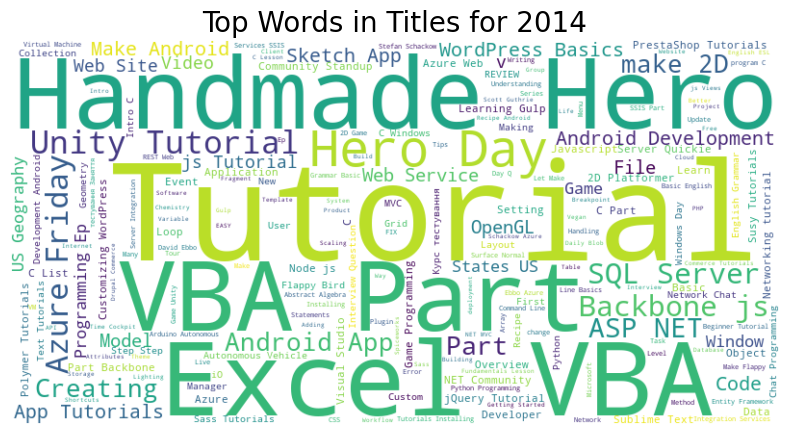

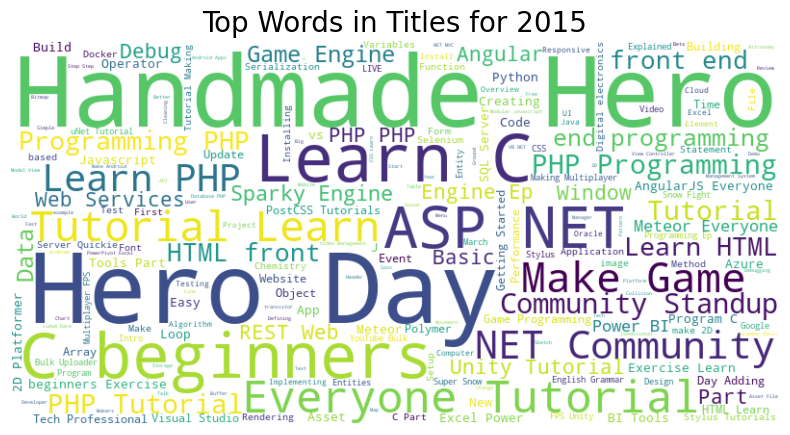

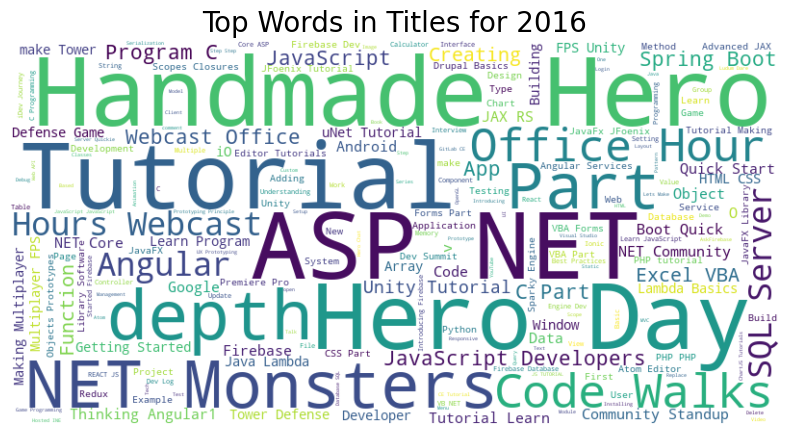

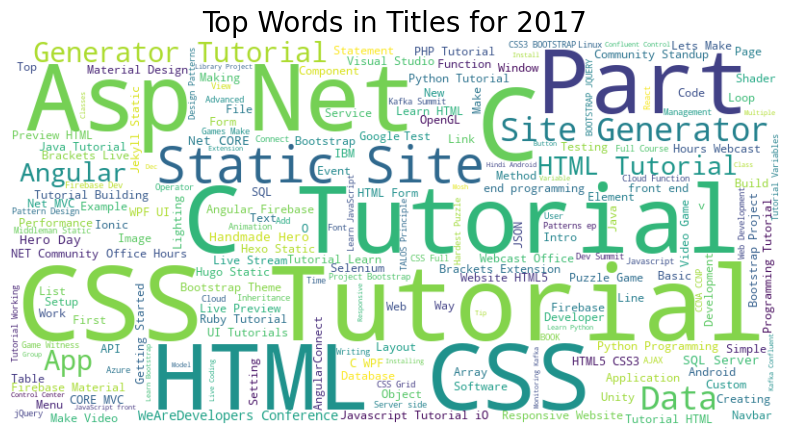

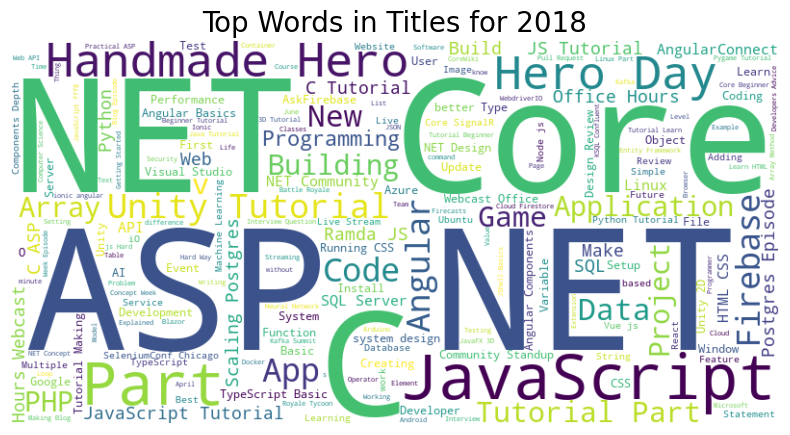

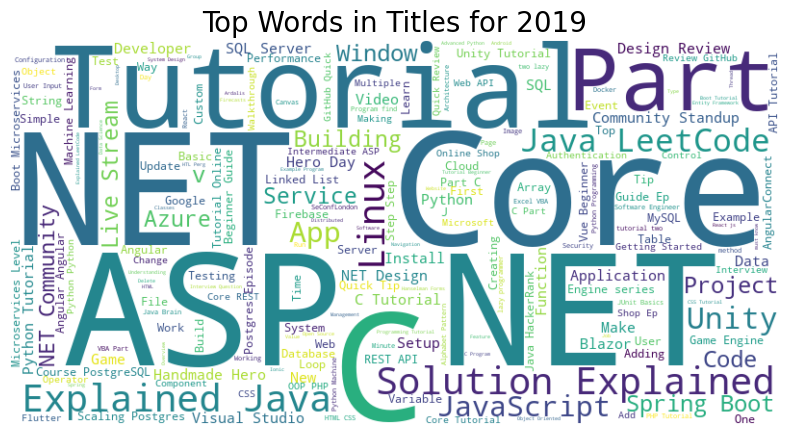

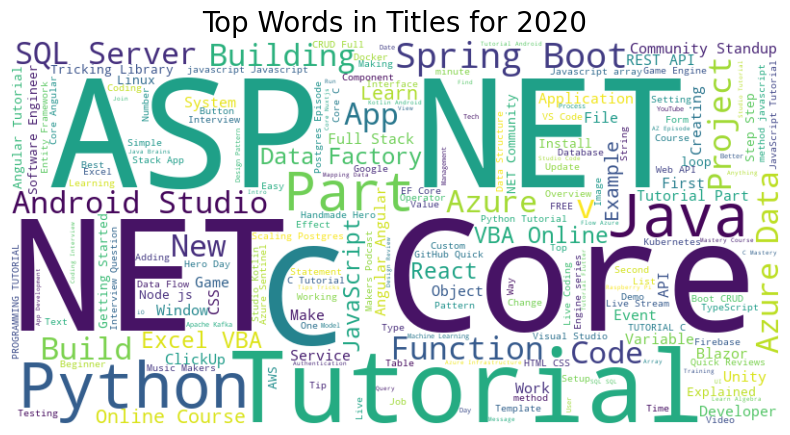

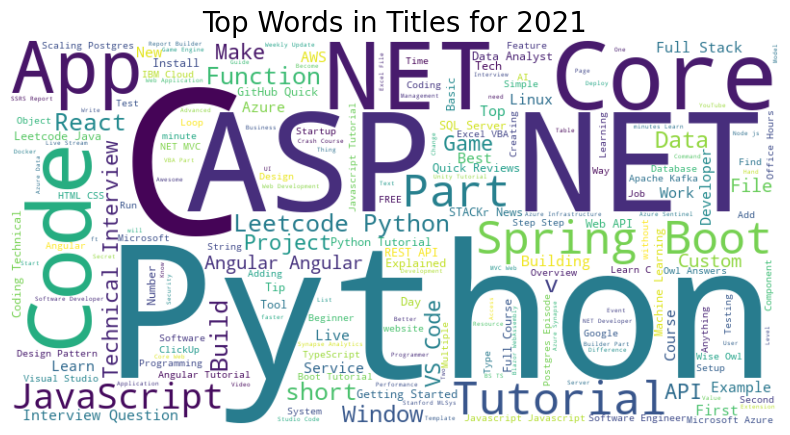

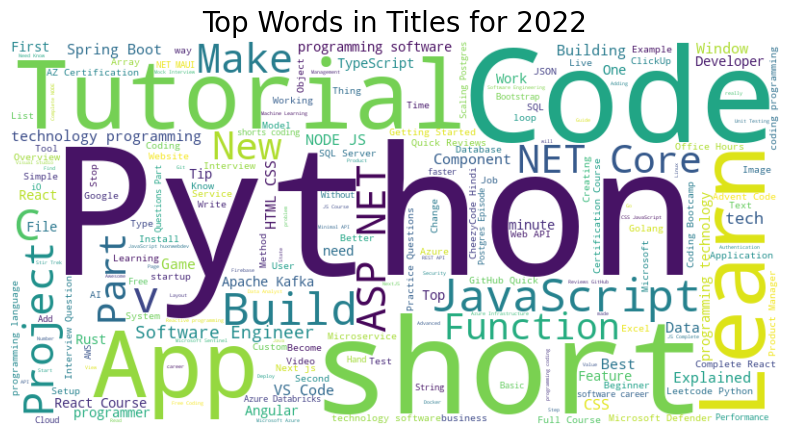

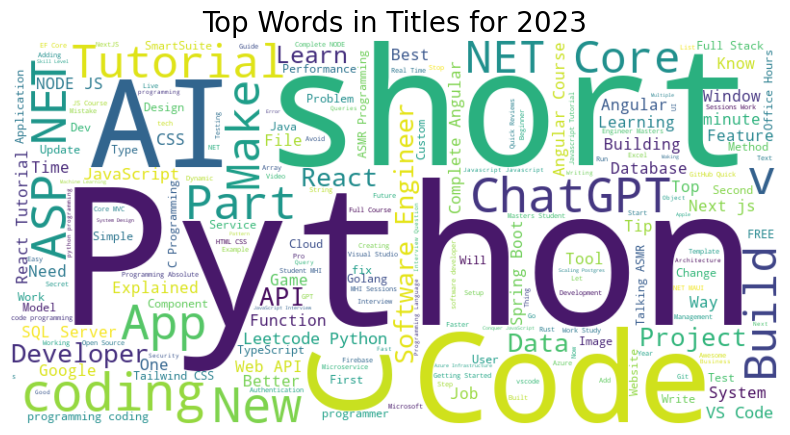

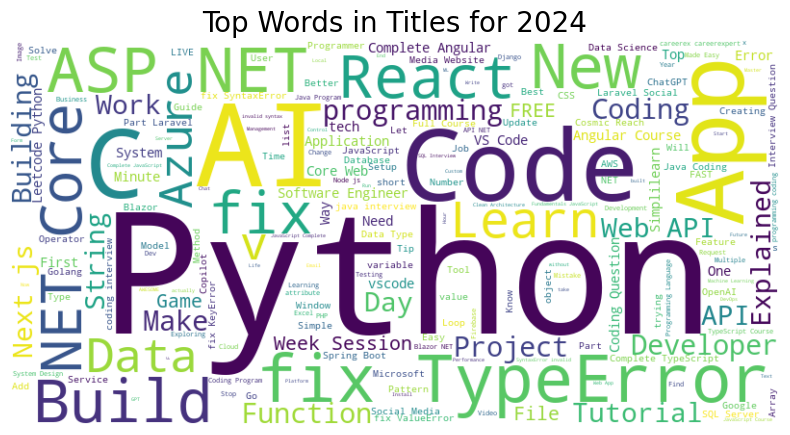

In [8]:
# Filter the DataFrame to include only records from 2014 onwards
df = df[df['Year'] >= 2014]


# Count the number of records for each unique ChannelId
channel_counts = df['ChannelId'].value_counts()

# Filter the DataFrame to include only channels with fewer than 1000 videos
filtered_channel_ids = channel_counts[channel_counts < 1000].index
df_filtered = df[df['ChannelId'].isin(filtered_channel_ids)]

# Define the custom list of words to filter out
custom_stopwords = {'the', 'a', 'in', 'of', 'to', 'and', 'for', 'on', 'with', 'as', 'at', 'by', 'from', 'using', 'use', 'introduction',
                   'create', 'beginners', 'interaction', 're invent', 'tutorial beginners', 're', 'packtpub'}

# Function to remove custom stopwords from text
def remove_custom_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Function to generate and display a word cloud
def generate_word_cloud(text, title, stopwords):
    # Remove custom stopwords
    filtered_text = remove_custom_stopwords(text, stopwords)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Iterate through each year and generate a word cloud for titles
for year in sorted(df_filtered['Year'].unique()):
    # Filter titles for the specific year
    titles = df_filtered[df_filtered['Year'] == year]['Title']
    # Concatenate all titles into a single string
    text = ' '.join(titles)
    # Generate and display the word cloud
    generate_word_cloud(text, f"Top Words in Titles for {year}", custom_stopwords)

Most popular authors


In [9]:
# Read data from most_efficient_channels.csv
df_2 = pd.read_csv('most_efficient_channels.csv')

# Replace Identifier values
# Replace Identifier values with clickable links
df_2['Identifier'] = df_2['Identifier'].apply(lambda x: f'<a href="https://youtube.com/channel/{x}">{x}</a>')


display(HTML(df_2.to_html(escape=False)))